In [7]:
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("filtered.csv")

# # for this csv, in other version codes will be included directly
# categorical_actions = df["action"].astype("category").cat
# df["action_codes"] = categorical_actions.codes
df.head()

,action,u,v,theta,omega,x,z,action_codes
0,"(-0.01745, 0)",-0.023892,0.013794,0.000000,1.047198,21.505500,-14.740650,0
1,"(-0.03491, 1)",-0.112727,-0.070093,0.077167,1.201851,21.362912,-14.449381,6
2,"(-0.05236, 0)",-0.224308,-0.015035,0.005716,1.537237,21.023926,-13.743845,10
3,"(-0.05236, 0)",-0.335679,-0.023467,-0.005623,1.520655,20.435261,-12.623645,10
4,"(-0.05236, 0)",-0.438113,-0.024909,-0.012200,1.449158,19.528942,-11.128546,10


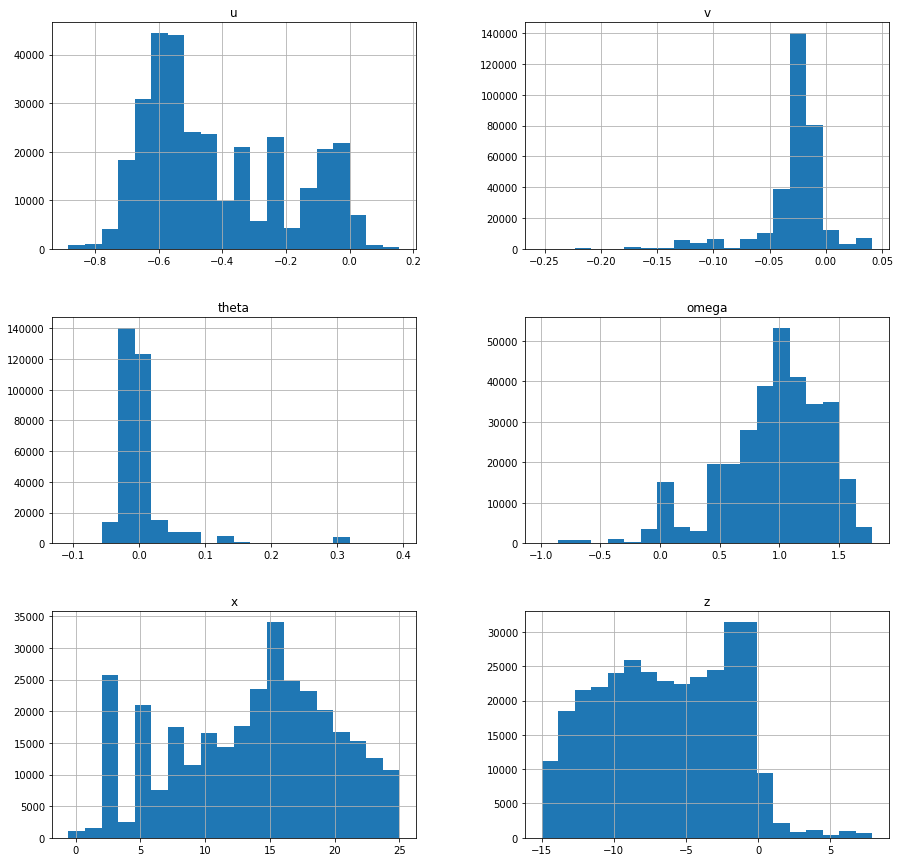

In [5]:
# observing the distribution of the continous variables
continous_var = ['u', 'v', 'theta', 'omega', 'x', 'z']
df[continous_var].hist(bins=20, figsize=(15, 15))
plt.show()

In [5]:
df.corr()

,u,v,theta,omega,x,z,action_codes
u,1.000000,-0.356896,0.399193,-0.216715,0.707499,-0.800285,-0.357689
v,-0.356896,1.000000,-0.492297,0.356515,-0.266392,0.227503,0.172085
theta,0.399193,-0.492297,1.000000,-0.019595,0.215305,-0.328286,-0.103019
omega,-0.216715,0.356515,-0.019595,1.000000,0.177367,-0.161733,0.077664
x,0.707499,-0.266392,0.215305,0.177367,1.000000,-0.762423,-0.343801
z,-0.800285,0.227503,-0.328286,-0.161733,-0.762423,1.000000,0.312113
action_codes,-0.357689,0.172085,-0.103019,0.077664,-0.343801,0.312113,1.000000


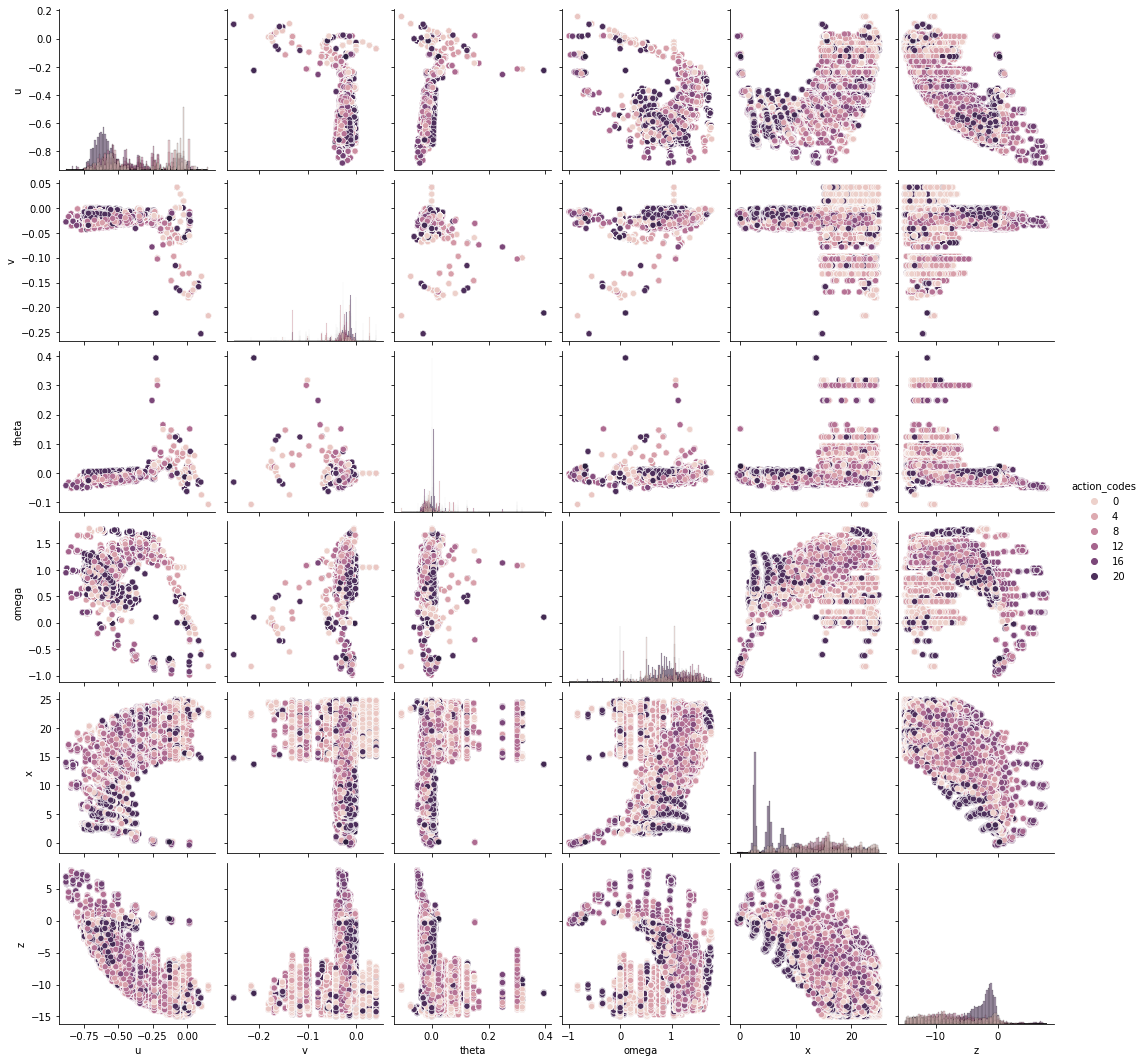

In [6]:
sns.pairplot(df[['u', 'v', 'theta', 'omega', 'x', 'z', 'action_codes']],
             vars=continous_var,
             hue='action_codes', diag_kind='hist', kind='scatter')
plt.show()

In [51]:
df["action_codes"].value_counts()

20    69289
10    45855
5     44664
0     40642
15    20233
16    16261
11    16160
1     16027
6     14164
12    11921
21     7896
7      6453
17     4715
2      3059
22     1030
18       69
13       62
8        26
9        24
4        24
23       24
3        23
14       15
19       14
Name: action_codes, dtype: int64

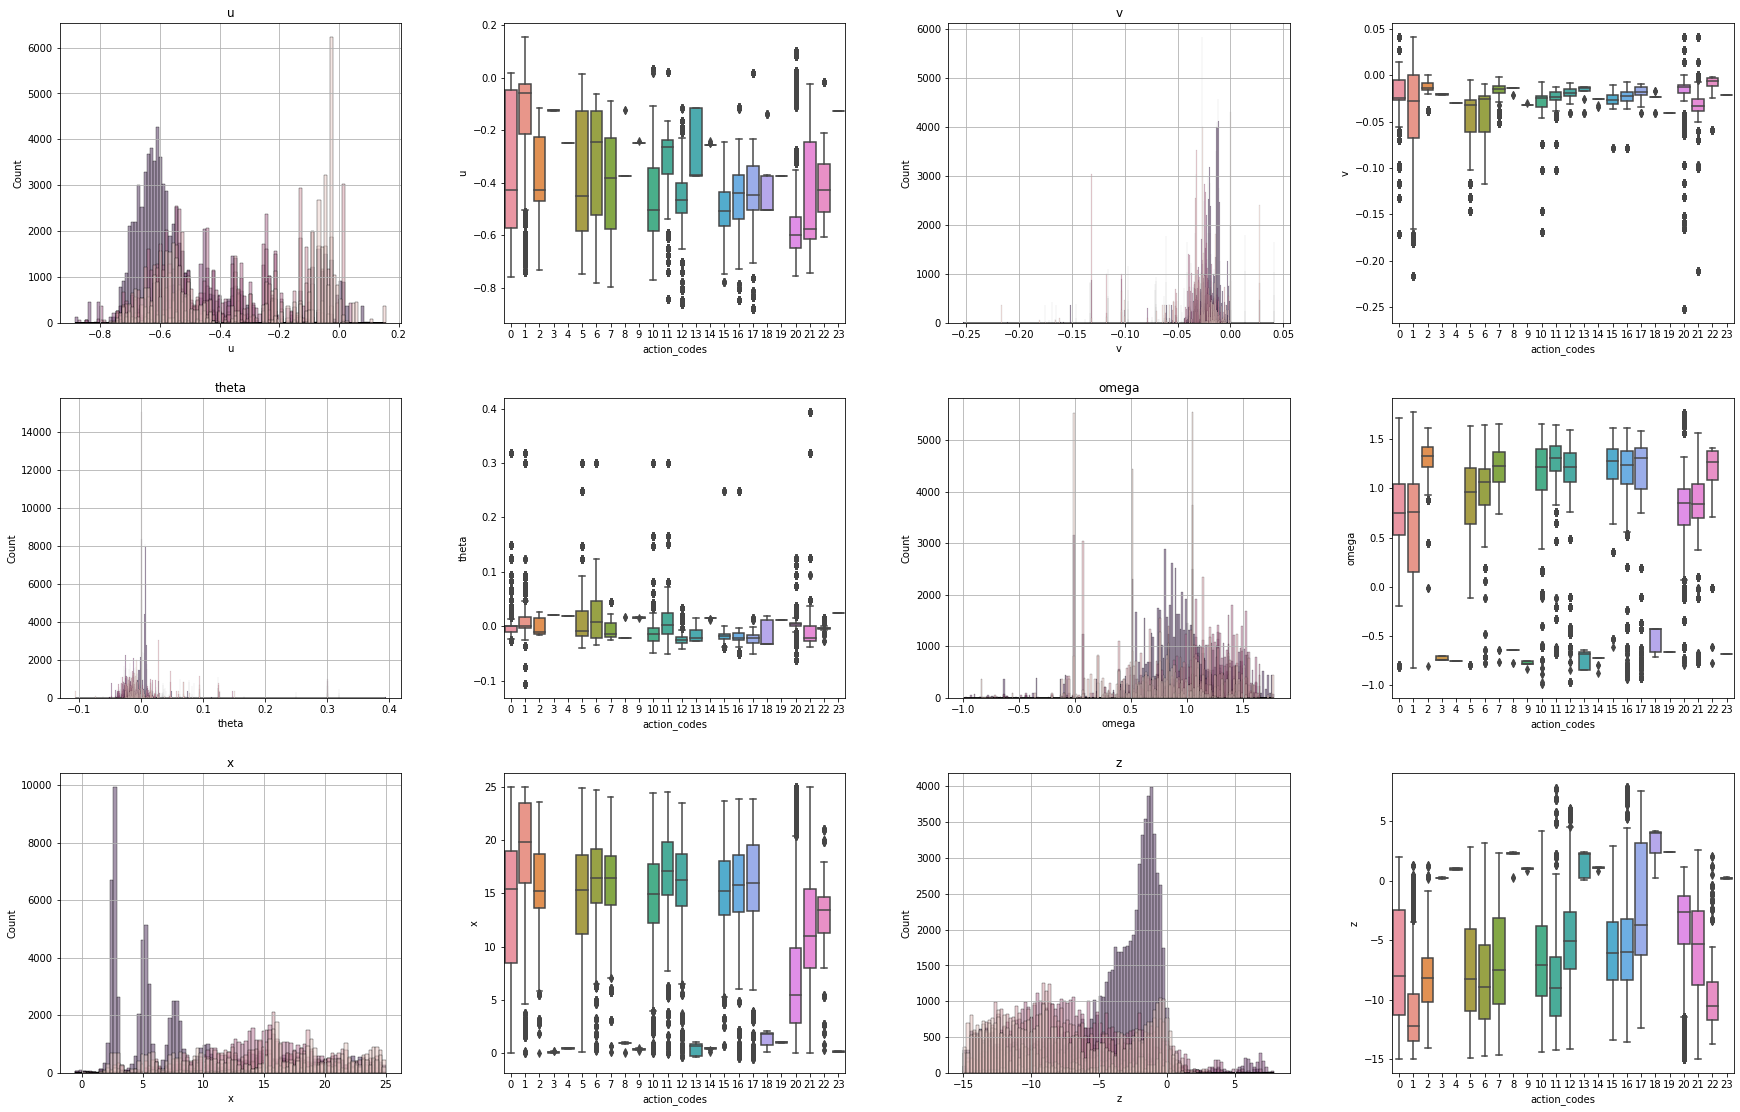

In [35]:
plt.figure(figsize=(30, 40))
for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.grid(True)
    plt.title(col)
    # sns.kdeplot(x=df[col], shade=True)
    sns.histplot(data=df, x=col, hue='action_codes', legend=False)

    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y = col, data = df, x="action_codes")

# Testing some classifiers

Let's perform some fast test!!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
rf = RandomForestClassifier()

# x_data, y_data = df[["z_distance", "x_distance", "omega_distance"]], df["action_codes"]
x_data, y_data = df[["u", "v", "theta", "omega", "x", "z"]].values, df["action_codes"].values

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, shuffle=True, test_size=.3, stratify=y_data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, test_size=.2, stratify=y_train)

In [11]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
train_acc = rf.score(X_train, y_train)
val_acc = rf.score(X_val, y_val)
test_acc = rf.score(X_test, y_test)

print("Train Acc: {0}, Val Acc: {1}, Test Acc: {2}".format(train_acc, val_acc, test_acc))

Train Acc: 1.0, Val Acc: 0.997803232386631, Test Acc: 0.9976567812124065


In [42]:
ind = 158
print("Real class: {0}".format(y_test[ind]))


probs = rf.predict_proba([X_test[ind]])
print("Probabilities:")
print(probs)
print("Predicted class: {0}".format(probs.argmax(axis=1)[0]))

Real class: 17
Probabilities:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted class: 17


In [32]:
feature_imp = pd.Series(rf.feature_importances_,index=continous_var).sort_values(ascending=False)
feature_imp

v        0.206284
theta    0.191997
z        0.162406
x        0.159802
u        0.143872
omega    0.135639
dtype: float64

In [13]:
X_train.shape, X_val.shape, X_test.shape, x_data.shape

((178444, 6), (44611, 6), (95595, 6), (318650, 6))

In [14]:
mlp = MLPClassifier()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [15]:
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [16]:
train_acc = mlp.score(X_train_scaled, y_train)
val_acc = mlp.score(X_val_scaled, y_val)
test_acc = mlp.score(X_test_scaled, y_test)

print("Train Acc: {0}, Val Acc: {1}, Test Acc: {2}".format(train_acc, val_acc, test_acc))

Train Acc: 0.7758792674452489, Val Acc: 0.7719620721346753, Test Acc: 0.7702599508342487


quote to self: DO NOT run svm. It is toooooo slow!!

And it is worse than other classifiers!!

In [39]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
train_acc = svm.score(X_train_scaled, y_train)
val_acc = svm.score(X_val_scaled, y_val)
test_acc = svm.score(X_test_scaled, y_test)

print("Train Acc: {0}, Val Acc: {1}, Test Acc: {2}".format(train_acc, val_acc, test_acc))

Train Acc: 0.7000907847840219, Val Acc: 0.7007688686646791, Test Acc: 0.6976724724096448


## Complicándome la vida por gusto

In [27]:
import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [28]:
class DirectSNet(nn.Module):

    def __init__(self, in_size, out_size):
        super(DirectSNet, self).__init__()
        self.name = "direct_snet"

        self.init_feat, self.res_feat, self.classifier = self.__net_structure__(in_size, out_size)

    def forward(self, x):
        x = self.init_feat(x)
        for i, f in enumerate(self.res_feat):
            # apply residual connection if not in the last feature sequential layer
            x = f(x) + x if i != len(self.res_feat) - 1 else f(x)
        return self.classifier(x)

    def __net_structure__(self, in_size, out_size):
        residual_size = 350
        ending_size = 512

        init_features = nn.Sequential(
            self.__module__(in_size, 1024),
            self.__module__(1024, residual_size)
        )
        residual_features = nn.ModuleList([
            nn.Sequential(
                self.__module__(residual_size, 200),
                self.__module__(200, residual_size),
            ),
            # apply residual connection, then:
            nn.Sequential(
                self.__module__(residual_size, 100),
                self.__module__(100, residual_size)
            ),
            # apply residual connection, then:
            self.__module__(residual_size, ending_size)
        ])
        classifier = nn.Linear(ending_size, out_size)

        return init_features, residual_features, classifier

    @staticmethod
    def __module__(in_size, out_size, dropout=.15):
        return nn.Sequential(
            nn.Linear(in_size, out_size),
            nn.LayerNorm(out_size),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

class StandardDS(Dataset):

    def __init__(self, x_data, y_data):
        super(StandardDS, self).__init__()
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.y_data)

    def __getitem__(self, item):
        return self.x_data[item], self.y_data[item]

In [29]:
def standard(epochs, network, loader_function, optimizer, criterion,
             print_every=100, accuracy_function=None):
    # TODO!! save best model after a given number of iterations. Add Early Stop
    for i in range(epochs):
        running_loss = total_items = running_acc = 0
        for x, y in loader_function():
            items_count = len(y)
            optimizer.zero_grad()

            y_hat = network(x)
            loss = criterion(y_hat, y)
            running_loss += loss.item() * items_count
            total_items += items_count
            if accuracy_function:
                running_acc += accuracy_function(y_hat, y)

            loss.backward()
            optimizer.step()
        if i % print_every == 0 or i == epochs - 1:
            print("==== Iter {0} =====".format(i))
            print("Avg. Loss: {0}".format(running_loss / total_items))
            if accuracy_function:
                print("Avg. Accuracy: {0}".format(running_acc / total_items))


def load_standard_data(dataset, use_cuda, device, **kwargs):
    data_loader = DataLoader(dataset, pin_memory=use_cuda, **kwargs)

    def iterate_function():
        for x, y in data_loader:
            x = x.to(device).float()
            y = y.to(device).long()
            yield x, y

    return iterate_function

In [31]:
use_cuda_ = torch.cuda.is_available()
device_ = torch.device('cuda' if use_cuda_ else 'cpu')

if device_.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0) / 1024 ** 3, 1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0) / 1024 ** 3, 1), 'GB')
else:
    print("Not using cuda")


m = DirectSNet(X_train.shape[1], 24)
m.to(device_)

loaders_dict = {
    'train': load_standard_data(
        StandardDS(X_train_scaled, y_train), use_cuda_, device_, batch_size=128
    ),
    'eval': load_standard_data(
        StandardDS(X_val_scaled, y_val), use_cuda_, device_, batch_size=128
    )
}

vc = df["action"].value_counts()
loss_w = torch.FloatTensor((1 - vc/vc.sum())**5).to(device_)
standard(10, m, loaders_dict['train'], torch.optim.RMSprop(m.parameters()), torch.nn.CrossEntropyLoss(weight=loss_w),
          accuracy_function=lambda y_hat, y: (y_hat.argmax(dim=1) == y).sum().float(), print_every=2)

Not using cuda
==== Iter 0 =====
Avg. Loss: 0.9976143116524613
Avg. Accuracy: 0.6170843243598938
==== Iter 2 =====
Avg. Loss: 0.5235268518324324
Avg. Accuracy: 0.7591849565505981
==== Iter 4 =====
Avg. Loss: 0.4332654939123549
Avg. Accuracy: 0.7951121926307678
==== Iter 6 =====
Avg. Loss: 0.3895678964702228
Avg. Accuracy: 0.8110331296920776
==== Iter 8 =====
Avg. Loss: 0.35989220175038766
Avg. Accuracy: 0.8231490254402161
==== Iter 9 =====
Avg. Loss: 0.3494879765210712
Avg. Accuracy: 0.8271951079368591
